# YouUniverse
_[Large-Scale Channel and Video Metadata from English-Speaking YouTube]_

- Data is made available through [Zenodo](https://doi.org/10.5281/zenodo.4650046).
- For context and an explanation of how data collection was done, see [the paper](https://arxiv.org/abs/2012.10378).
- Please cite this dataset if you use it:

~~~bibtex
@inproceedings{ribeiro2021youniverse,
      title={YouNiverse: Large-Scale Channel and Video Metadata from English-Speaking YouTube},
      author={Ribeiro, Manoel Horta and West Robert},
      year={2021},
      booktitle={{Proceedings of the 15th International AAAI Conference
                  on Weblogs and Social Media (ICWSM'21)}}
}
~~~

## Channel Data

The file `df_channels_en.tsv.gz` contains data related to channels.
It aggregates both basic stats from channels obtained from `channelcrawler.com`,
as well as rankings obtained from `socialblade.com`.

- `category_cc`: category of the channel.
- `join_date`: join date of the channel.
- `channel`: channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal

| category_cc | join_date  | channel                  | name_cc      | subscribers_cc | videos_cc | subscriber_rank_sb |  weights |
|:------------|:-----------|:-------------------------|:-------------|---------------:|----------:|-------------------:|---------:|
| Gaming      | 2015-08-26 | UCi_AR7WqvXa6LEnRn_7ES7A | Thunder Play |          11500 |       849 |             877395 |  11.175  |
| Sports      | 2016-02-04 | UCgVlxaBsBkmMh2SUgrzG1ZQ | Thunder Prod |          76000 |        61 |             198340 |  5.5295  |
| Music       | 2013-09-14 | UCNBYpqbD64tkuuFS-NNhkfQ | Thunder Rain |          33700 |        58 |             382980 |  6.5855  |


## Time Series Data

The file `df_timeseries_en.csv.gz` contains data related to time series.
We have a data point for each channel and each week:

- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.

| channel                  | category           | datetime   | views   | delta_views | subs | delta_subs | videos | delta_videos | activity |
|:-------------------------|:-------------------|:-----------|--------:|------------:|-----:|-----------:|-------:|-------------:|---------:|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |

Some facts about it:

- This file contains 18,872,499 data points belonging to 153,550 channels.
- In average, it contains 2.8 years of data for each channel
- Data goes from early January 2015 to the end of September 2019. Not all channels have the complete time frame.
- Additionally we filtered all channels that were not in english given their video metadata (see `Raw Channels').

## Video Metadata

The file `yt_metadata_en.jsonl.gz` contains metadata data related to ~73M videos from ~137k channels.
Below we show the data recorded for each of the video

    {
        'categories': 'People & Blogs',
        'channel_id': 'UCzzYnZ8GIzfB1Vr3hk2Nj9Q',
        'crawl_date': '2019-11-02 09:01:05.328421',
        'description': 'See more at http://www.standstrongcompany.com Fitness Keep it healthy at (...)',
        'dislike_count': 8,
        'display_id': 'x72dBgcVPFI',
        'duration': 187,
        'like_count': 91,
        'tags': 'Tiger Fitness,TigerFitness,fitness,workout,diet,health,pre workout,ab workout,(...)',
        'title': 'Slingshot for Squats? | Tiger Fitness',
        'upload_date': '2019-04-21 00:00:00',
        'view_count': 2559
    }
    
Some facts about it:
- This data was crawled from YouTube between 2019-10-29 and 2019-11-23.
- It contains 72,924,794 videos created between 2005-05-24 to 2019-11-20.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/kadabros/notebooks')

In [3]:
import gzip
import json
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather
import seaborn as sns

In [4]:
NOTEBOOK_PATH = os.getcwd()
DIR_PATH = os.path.dirname(NOTEBOOK_PATH)
DATA_PATH = os.path.join(DIR_PATH, "data_youniverse")
UTILS_PATH = os.path.join(DIR_PATH, "utils")

# append utils path and import utils
sys.path.append(UTILS_PATH)
from ploting import *
from loading import *

CATEGORY = "People & Blogs"

In [ ]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t")
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 30 sec

# Distribution of Categories in the YouNiverse Dataset

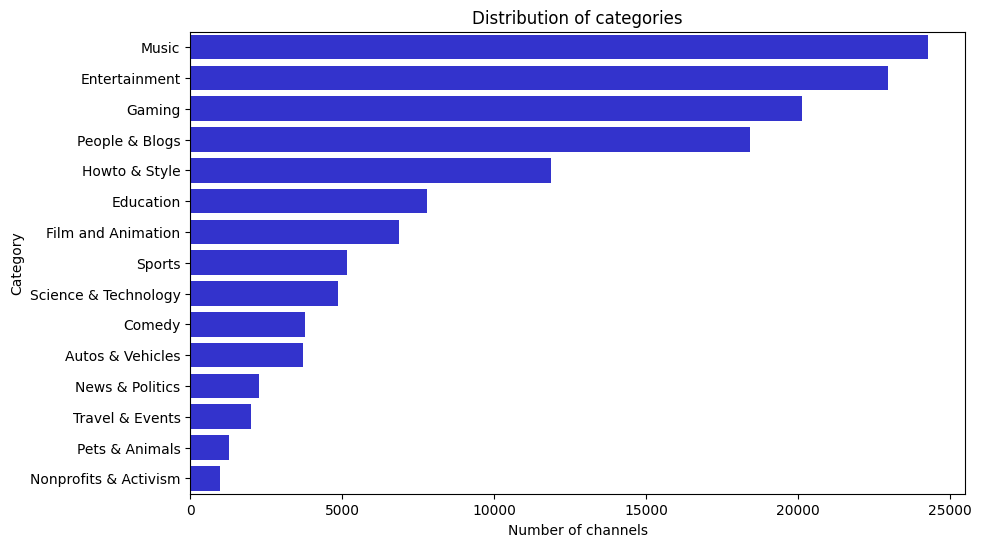

In [ ]:
category_value_counts = df_channels_en["category_cc"].value_counts()

# Plot distribution of categories, emphasis on the People & Blogs category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_value_counts.values, y=category_value_counts.index, orient="h", color="b", saturation=0.6)
plt.title("Distribution of categories")
plt.xlabel("Number of channels")
plt.ylabel("Category")
plt.show();

# Abstract
In this data analysis story, we will focus on exploring the dynamics of the "People & Blogs" category on YouTube from 2012 to 2019. The analysis delves into the evolution of subcategories within "People & Blogs," investigates how YouTube channels strategically navigate and benefit from subcategory trends, and explores the specific evolution of the Vlog subcategory. Our aim is to understand when and why channels eventually have transitioned into or out of the People & Blogs categories over the past decade.


## Load, Filter, and Save yt_metadata_People&Blogs

In [ ]:
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(os.path.join(DATA_PATH, "yt_metadata_en.jsonl.gz"), CATEGORY)
yt_metadata_filtered.to_csv(CATEGORY_FILE_PATH, index=False, compression="gzip") # 17m 14s | category = People & Blogs
yt_metadata_filtered.head()

# Research Questions (CONCEPTS so far...)
- How does a YouTube subcategory's popularity within "People & Blogs" evolve over time?
- How do YouTube channels within the "People & Blogs" category leverage the popularity of their respective subcategories?
- What insights can be gained from the evolution of Vlog videos within "People & Blogs" over time (considering factors such as length, views, likes, dislikes, and comments)?
- How did Youtube channels morphing either into or out of the People & Blogs categories fare after the transition ? E.g. how was a channel's popularity affected after migrating from Gaming to Vlog ?

In [5]:
yt_metadata_filtered = pd.read_csv(os.path.join(DATA_PATH, "df_channels_people&blogs.tsv.gz"), compression="infer")
yt_metadata_filtered.head(5)

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,People & Blogs,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:35.725333,0.0,LZPh8ky-RP8,175,8.0,"thomas train,thomas toby,thomas salty,thomas p...",2015-11-07 00:00:00,1307.0
1,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.405938,613.0,BDnF-EgqAGw,398,49464.0,"vine,vines,vine compilation,chaotic good",2019-02-05 00:00:00,1142835.0
2,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.959894,588.0,wrTIXbQED80,375,32726.0,"vines,vine,vine compilation,neutral good,align...",2019-01-31 00:00:00,819654.0
3,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.467288,1177.0,uyWL0ZWibyU,335,86222.0,"vine,vines,vine compilation,neutral evil",2019-01-22 00:00:00,2159837.0
4,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.948318,673.0,yd7d51AgSso,319,30596.0,NaN,2019-01-15 00:00:00,736707.0


In [6]:
# convert upload_date to datetime
yt_metadata_filtered['upload_date'] = yt_metadata_filtered['upload_date'].astype('datetime64[ns]')

# Tags Analysis
### Trying to Figure Out What Subcategories Are Within the Category "People & Blogs" Based On The Tags

By using a pre-trained Word2Vec model (GloVE-100) and t-SNE, we try to visualize which word relate to which in regards to see if subcategories can be determined from the cluster of tags

In [ ]:
import gensim.downloader as api
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load pre-trained Word2Vec model
model = api.load("glove-wiki-gigaword-100")  # Using GloVe model for simplicity

tags = list(yt_metadata_filtered.tags.unique())

# Filter words that are in the model's vocabulary
filtered_tags = [tag for tag in tags if tag in model]

# Get vectors for each word
tag_vectors = np.array([model[tag] for tag in filtered_tags])

# Clustering
num_clusters = 20  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tag_vectors)

# Assigning words to clusters
clusters = {i: [] for i in range(num_clusters)}
for tag, cluster_label in zip(filtered_tags, kmeans.labels_):
    clusters[cluster_label].append(tag)

# Print clusters
for cluster, tags in clusters.items():
    print(f"Cluster {cluster}: {tags}")


[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: ['traffic', 'weather', 'hurricane', 'shopping', 'moon', 'mars', 'earth', 'fishing', 'walk', 'train', 'walking', 'trams', 'taxi', 'airports', 'fireworks', 'elevator', 'bus', 'boat', 'slide', 'storm', 'precipitation', 'normal', 'exploration', 'electricity', 'standby', 'crash', 'sunset', 'car', 'speeds', 'pollution', 'shutdown', 'caravan', 'flood', 'clouds', 'earthquake', 'haul', 'havana', 'repair', 'twin', 'thunderstorm', 'parking', 'panama', 'cruising', 'spring', 'stream', 'parallel', 'railway', 'trailer', 'hawaii', 'trucking', 'road', 'ran', 'plants', 'ships', 'amtrak', 'sun', 'flame', 'missing', 'trailers', 'snow', 'disneyland', 'fire', 'wildfire', 'explosion', 'mercedes', 'jeep', 'automobiles', 'monument', 'park', 'heathrow', 'street', 'shook', 'castle', 'map', 'moving', 'trains', 'roar', 'downward', 'motor', 'balloons', 'sink', 'water', 'rain', 'cold', 'hail', 'parade', 'floor', 'cruise', 'concorde', 'bangkok', 'tires', 'construction', 'light', 'journey', 'refuel', 'inflo

In [ ]:
tsne = TSNE(n_components=3, random_state=0, perplexity=50)
tag_vectors_3d = tsne.fit_transform(tag_vectors)

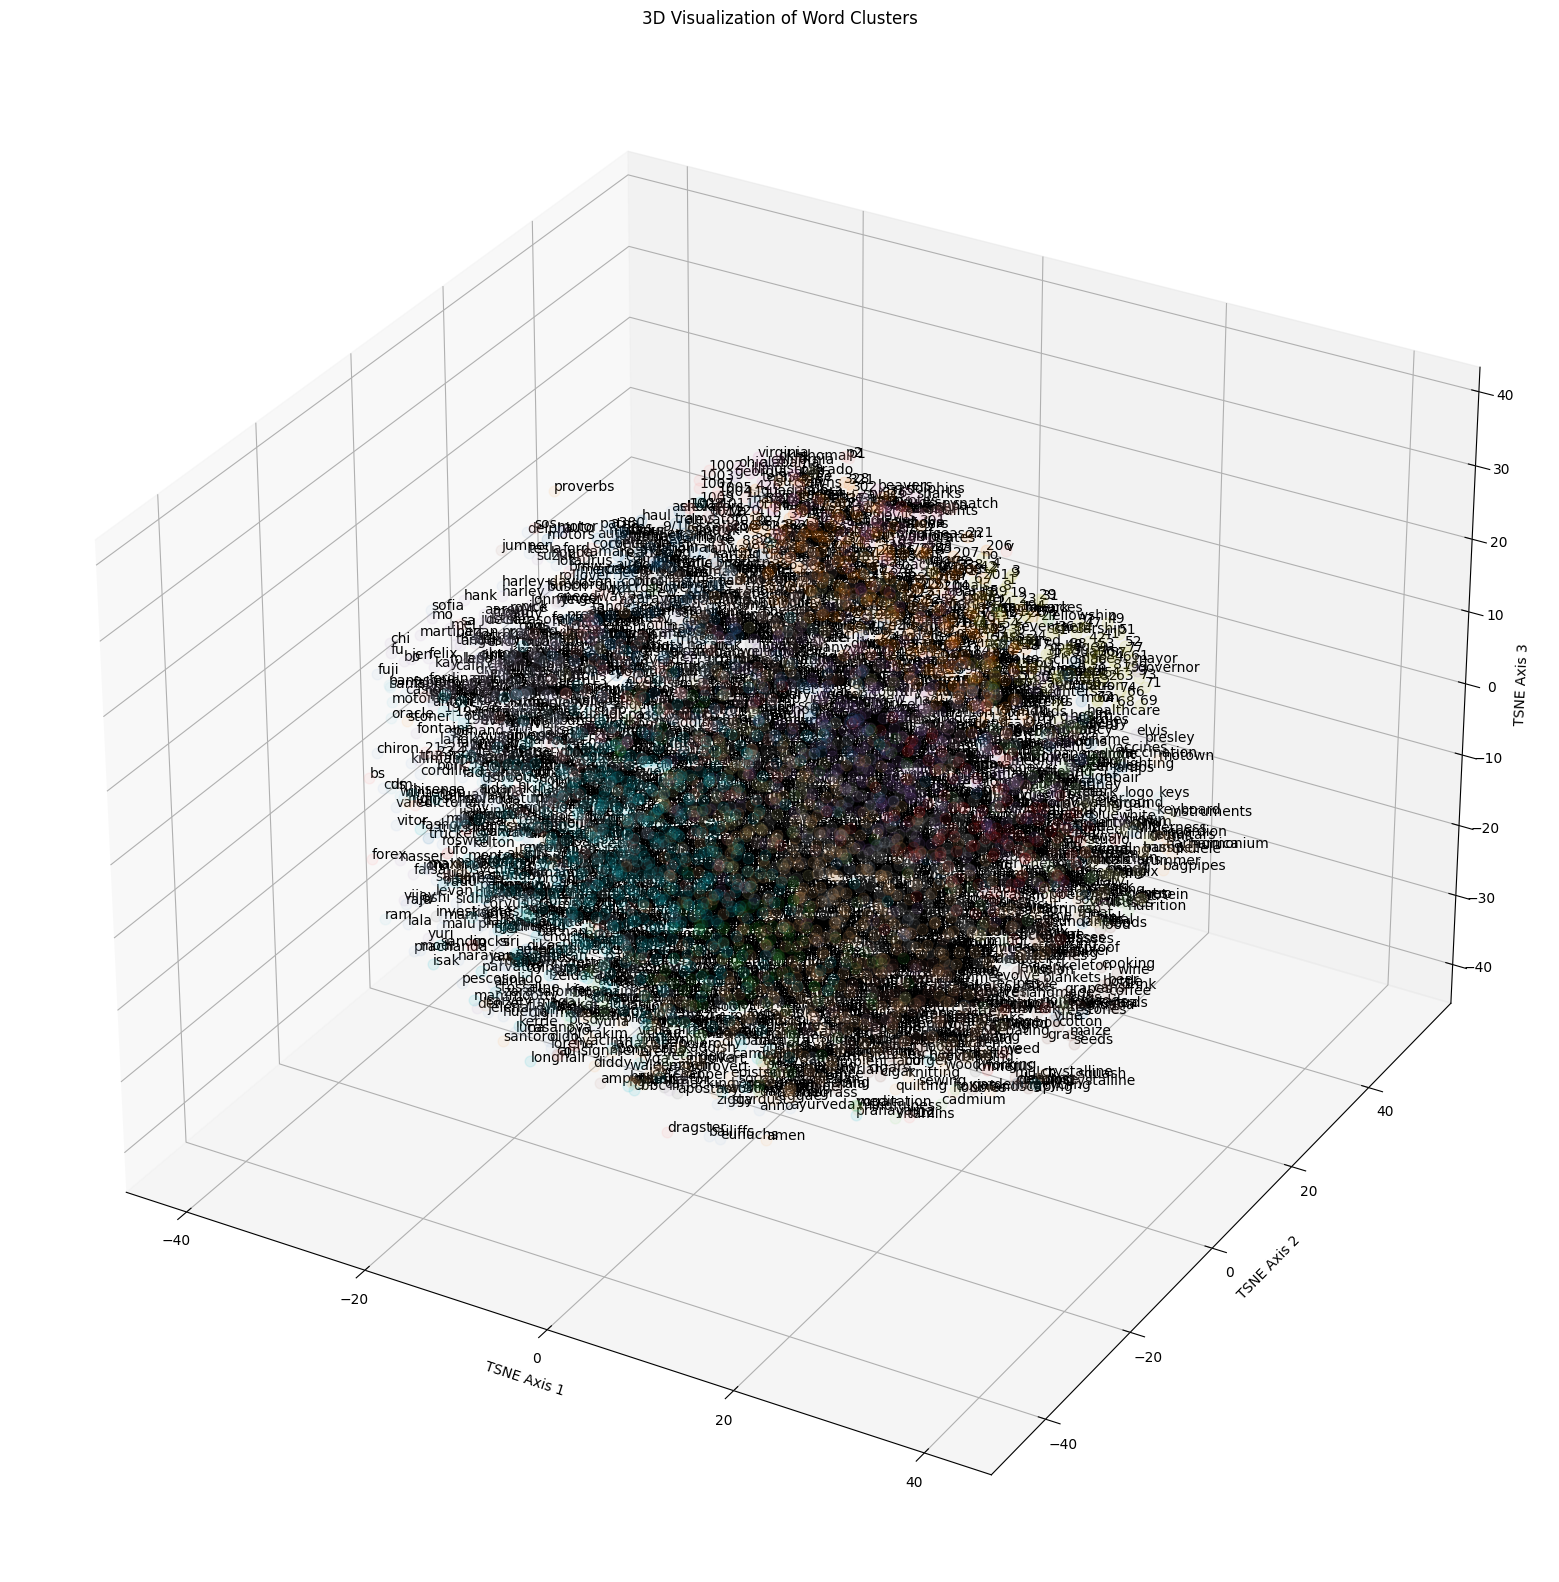

In [ ]:
# Plotting
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')


cmap = plt.get_cmap('tab20', num_clusters)
colors = cmap(np.linspace(0, 1, num_clusters))


for i, tag in enumerate(filtered_tags):
    ax.scatter(tag_vectors_3d[i, 0], tag_vectors_3d[i, 1], tag_vectors_3d[i, 2], color=colors[kmeans.labels_[i]], alpha = 0.1, s=60)
    ax.text(tag_vectors_3d[i, 0], tag_vectors_3d[i, 1], tag_vectors_3d[i, 2], tag, size=10, zorder=1, color='k')

ax.set_xlabel('TSNE Axis 1')
ax.set_ylabel('TSNE Axis 2')
ax.set_zlabel('TSNE Axis 3')
plt.title('3D Visualization of Word Clusters')
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming 'word_vectors_3d' is your array of 3D vectors and 'labels' are your words.
cluster_labels = kmeans.labels_

# Generate a list of colors, one for each cluster label
num_clusters = len(np.unique(cluster_labels))
colors = px.colors.qualitative.Set3

# Make sure you have as many colors as clusters, or cycle through them
cluster_colors = [colors[i % len(colors)] for i in cluster_labels]

trace = go.Scatter3d(
    x=tag_vectors_3d[:, 0],
    y=tag_vectors_3d[:, 1],
    z=tag_vectors_3d[:, 2],
    mode='markers+text',
    marker=dict(
        size=5,
        color=cluster_colors,  # Assign a color to each point
        opacity=0.8
    ),
    text=cluster_labels,  # The words to be labeled
    textposition='bottom center'
)

data = [trace]
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='TSNE Axis 1'),
        yaxis=dict(title='TSNE Axis 2'),
        zaxis=dict(title='TSNE Axis 3'),
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [ ]:
people_blogs_tags = yt_metadata_filtered.tags
people_blogs_tags


0          thomas train,thomas toby,thomas salty,thomas p...
1                   vine,vines,vine compilation,chaotic good
2          vines,vine,vine compilation,neutral good,align...
3                   vine,vines,vine compilation,neutral evil
4                                                        NaN
                                 ...                        
6910661    BJP,BJP Video,Bharatiya Janata Party,BJP India...
6910662    Bharatiya Janata Party,Join BJP,News,Politics,...
6910663    News,Teacher (Occupation),Teachers' Day (Holid...
6910664    BJP,Atal Bihari Vajpayee,Poet,Poetry,Poem,Kavi...
6910665    BJP,Namo Namo,Kedarnath,Narendra Modi,Shiva,Ze...
Name: tags, Length: 6910666, dtype: object

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

people_blogs_tags = yt_metadata_filtered.tags
people_blogs_tags = people_blogs_tags.dropna().apply(lambda x: x.split(','))

all_tags = [tag for sublist in people_blogs_tags for tag in sublist]


# Step 3: Frequency analysis
tag_counts = Counter(all_tags)
most_common_tags = tag_counts.most_common(20)  # Get the 20 most common tags

# Step 4: Clustering or topic modeling (using LDA for this example)
vectorizer = CountVectorizer()
tag_matrix = vectorizer.fit_transform([', '.join(tags) for tags in people_blogs_tags])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=0)  # Assuming 5 subcategories
lda.fit(tag_matrix)



In [11]:
most_common_tags

[('vlog', 343223),
 ('funny', 195900),
 ('family', 156139),
 ('love', 115969),
 ('fun', 113509),
 ('vlogger', 105206),
 ('video', 100624),
 ('news', 98602),
 ('review', 95333),
 ('how to', 92582),
 ('kids', 91697),
 ('vlogs', 90302),
 ('vlogging', 88656),
 ('food', 83954),
 ('comedy', 83054),
 ('new', 79670),
 ('baby', 75915),
 ('daily vlog', 75033),
 ('travel', 74367),
 ('daily', 73473)]

In [10]:
# Each topic (subcategory) in LDA is a mixture of tags
# To get the top tags for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #0:
food recipe vegan in disney eating christmas cooking to youtube recipes the street healthy chicken how toys eat diet mukbang review toy challenge keto and
Topic #1:
of the god jesus christian bible is and healing church life religion to tv christ you love prayer beer spirit holy people islam truth spiritual
Topic #2:
tarot love reading astrology horoscope 2018 2019 reaction gay weekly the 2017 psychic kpop de cancer in leo football aries taurus virgo scorpio gemini libra
Topic #3:
news live stock hair tv latest today analysis market cnbc technical awaaz india trump abp somoy in bangladesh hindi bangla local election 2018 comedy top
Topic #4:
vlog family vlogs the life baby daily kids in vlogger and funny mom day fun travel vloggers video new my vlogging cute couple of with
Topic #5:
to how for in tips make weight fitness workout home money health diy get business loss tutorial and of training your free online best school
Topic #6:
video the game movie of new reaction funny be

In [ ]:
df_videos = pd.DataFrame({
    'category': ['People & Blogs', 'Gaming', 'People & Blogs', ...],
    'tags': [['vlog', 'daily life'], ['letsplay', 'strategy'], ['makeup', 'beauty tips'], ...]
})

people_blogs_tags = df_videos[df_videos['category'] == 'People & Blogs']['tags']
people_blogs_tags


0       [vlog, daily life]
2    [makeup, beauty tips]
Name: tags, dtype: object

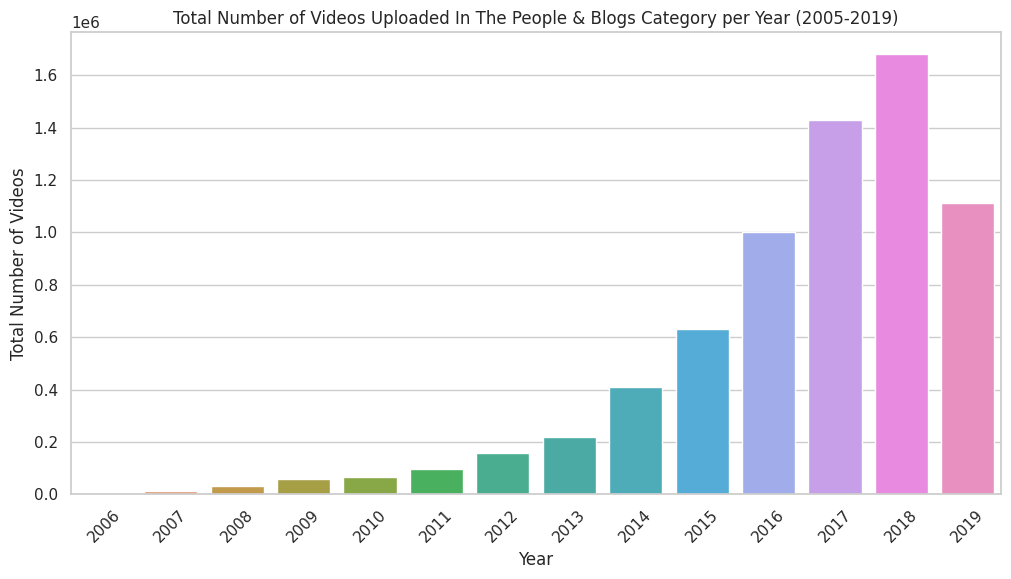

In [ ]:
video_count = yt_metadata_filtered.groupby(pd.Grouper(key="upload_date", freq="W")).count().channel_id

yearly_totals = video_count.groupby(video_count.index.year).sum()

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_totals.index, y=yearly_totals.values)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show()

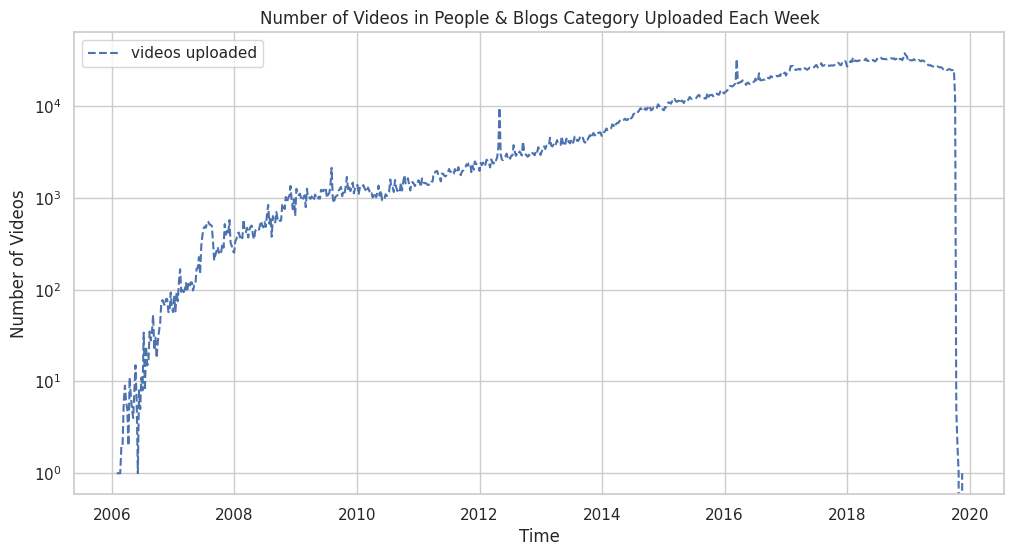

In [ ]:
sns.set(style="whitegrid")  # Setting the style using seaborn
plt.figure(figsize=(12, 6))  # Creating a figure with a specific size
sns.lineplot(data=video_count, linestyle="--", label="videos uploaded")
plt.yscale("log")  # Setting the y-axis to logarithmic scale
plt.ylabel("Number of Videos")  # Setting y-axis label
plt.xlabel("Time")  # Setting x-axis label
plt.title("Number of Videos in People & Blogs Category Uploaded Each Week")  # Setting the title
plt.show()  # Displaying the plot

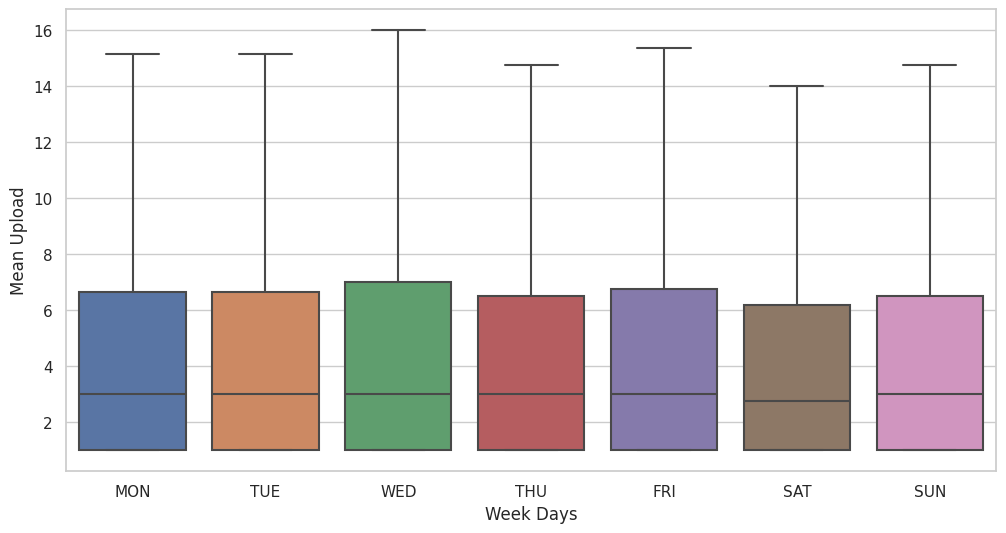

In [ ]:
yt_metadata_filtered["yearNumber"] = yt_metadata_filtered["upload_date"].dt.year
yt_metadata_filtered["weekNumber"] = yt_metadata_filtered["upload_date"].dt.weekday
vd_cnt_by_id_wk = (
    yt_metadata_filtered.groupby(["channel_id", "weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_wk.columns.name = None
vd_cnt_by_id_wk["mean_upload"] = vd_cnt_by_id_wk.iloc[:, 2:].mean(axis=1, skipna=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

labels = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
ax = sns.boxplot(
    x="weekNumber", y="mean_upload", data=vd_cnt_by_id_wk, showfliers=False
).set(xlabel="Week Days", ylabel="Mean Upload", xticklabels=labels)

### How does a YouTube subcategory's popularity within "People & Blogs" evolve over time?

- Dataset Utilization: Use the time-series data, which includes weekly subscriber and view counts for most channels (97%), averaged over 2.8 years per channel​​.

- Analysis Method: Track the evolution of subscriber and view counts for channels within the "People & Blogs" category over time. This can highlight trends and shifts in popularity.

In [ ]:
df_channels_filt = df_channels_en[df_channels_en['category_cc']==CATEGORY]
df_timeseries_filt = df_timeseries_en[df_timeseries_en['category']==CATEGORY]
top10_people_blogs = list(df_channels_filt.nlargest(n=10, columns = ['subscribers_cc'])['name_cc'])

In [ ]:
df_channel_timeseries = pd.merge(df_channels_filt, df_timeseries_filt, on = "channel")
df_channel_timeseries.head(5)


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087,People & Blogs,2016-10-10 00:00:00,1.153651e+07,1.707430e+05,314683.500000,0.000000,53,0,3
1,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087,People & Blogs,2016-10-17 00:00:00,1.188670e+07,3.501910e+05,324028.875000,9345.375000,59,6,9
2,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087,People & Blogs,2016-10-24 00:00:00,1.294078e+07,1.054077e+06,364066.250000,40037.375000,67,8,16
3,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087,People & Blogs,2016-10-30 23:00:00,1.579009e+07,2.849306e+06,474013.782383,109947.532383,73,6,15
4,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087,People & Blogs,2016-11-06 23:00:00,1.988030e+07,4.090208e+06,554442.259067,80428.476684,79,6,14


In [ ]:
from matplotlib.ticker import MaxNLocator


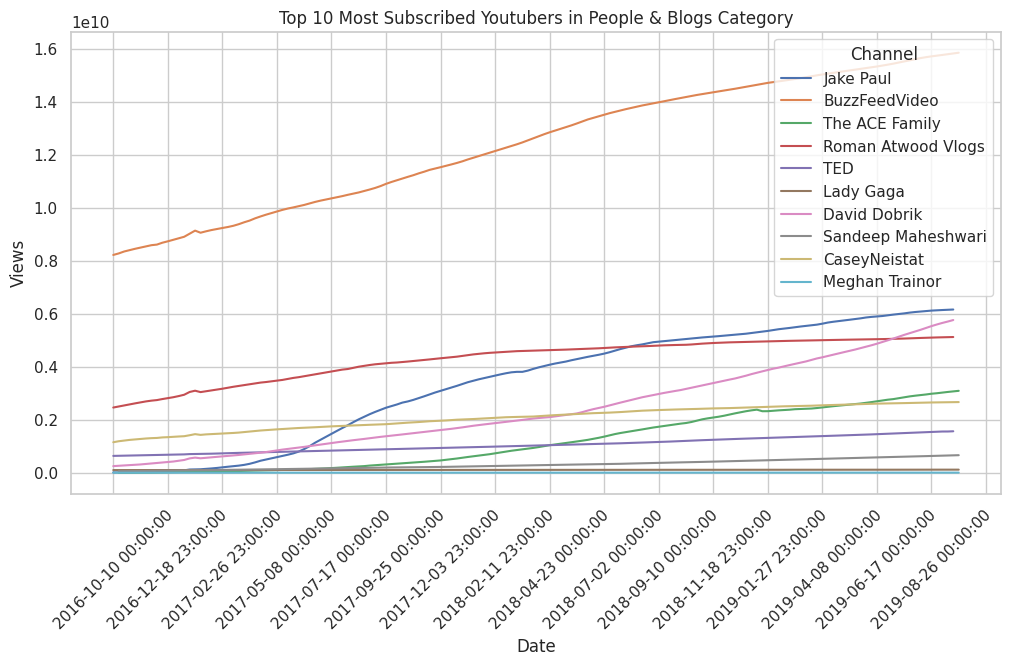

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
for person in top10_people_blogs:
  ax = sns.lineplot(data=df_channel_timeseries[df_channel_timeseries['name_cc']==person],
               x='datetime',
               y='views',
               label=person
               )

ax.xaxis.set_major_locator(MaxNLocator(nbins=20)) # where 'auto' tries to automatically find a good number

plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='Channel')  # Add a legend with title
plt.title("Top 10 Most Subscribed Youtubers in People & Blogs Category")
plt.show()

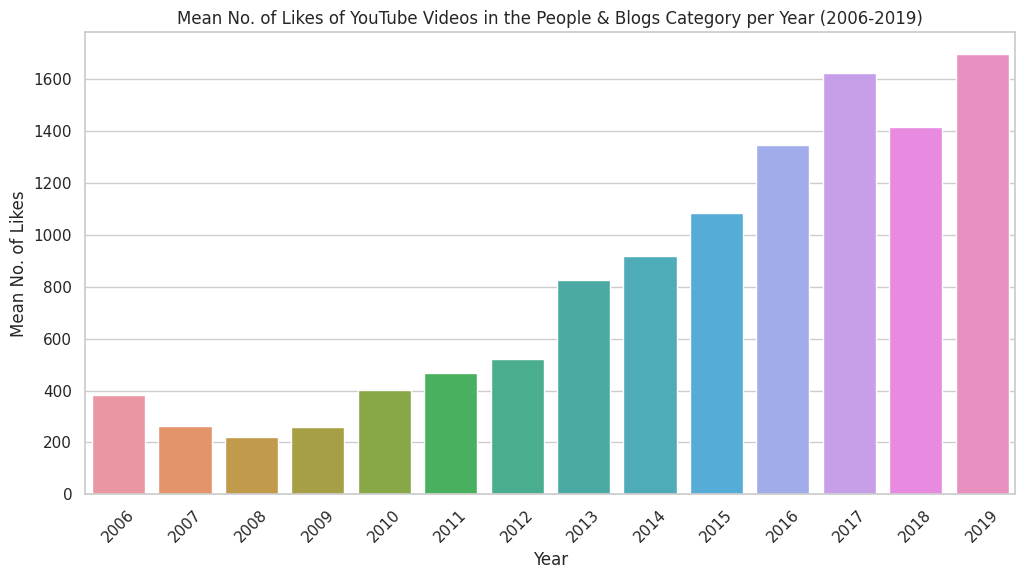

In [ ]:
df_likes = yt_metadata_filtered.groupby('yearNumber')['like_count'].mean().reset_index()

# Rename the columns for clarity
df_likes.columns = ['Year', 'Mean No. of Likes']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Mean No. of Likes', data=df_likes)
plt.xticks(rotation=45)
plt.title('Mean No. of Likes of YouTube Videos in the People & Blogs Category per Year (2006-2019)')
plt.show()

In [ ]:
df_channels_filt = df_channels_en[df_channels_en['category_cc']==CATEGORY]
df_timeseries_filt = df_timeseries_en[df_timeseries_en['category']==CATEGORY]
df_channels_filt.nlargest(n=10, columns = ['subscribers_cc'])

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
89,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087
98,People & Blogs,2011-08-10,UCpko_-a4wgz2u_DgDgd9fqA,BuzzFeedVideo,19400000,6334,158.0,2.087
120,People & Blogs,2016-01-10,UCWwWOFsW68TqXE-HZLC3WIA,The ACE Family,17600000,460,185.0,2.087
157,People & Blogs,2013-08-12,UC-SV8-bUJfXjrRMnp7F8Wzw,Roman Atwood Vlogs,15300000,1637,241.0,2.087
137,People & Blogs,2006-12-06,UCAuUUnT6oDeKwE6v1NGQxug,TED,14800000,3105,211.0,2.087
154,People & Blogs,2008-05-15,UCNL1ZadSjHpjm4q9j2sVtOA,Lady Gaga,14495273,163,238.0,2.087
180,People & Blogs,2014-12-19,UCmh5gdwCx6lN7gEC20leNVA,David Dobrik,13900000,601,280.0,2.087
188,People & Blogs,2012-02-13,UCBqFKDipsnzvJdt6UT0lMIg,Sandeep Maheshwari,12000000,240,296.0,2.087
249,People & Blogs,2010-02-15,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,11500000,1015,405.0,2.087
286,People & Blogs,2008-06-04,UCkXgEcpoTE4tHsebYBouWpA,Meghan Trainor,10707485,13,470.0,2.087


### How do YouTube channels within the "People & Blogs" category leverage the popularity of their respective subcategories?

- Dataset Utilization: Analyze the video and channel metadata, which include likes, dislikes, views, duration, and self-assigned tags, along with channel-level subscriber and video counts​​.

- Analysis Method: Investigate how changes in video content (tags, duration, etc.) and channel focus align with shifts in subcategory popularity. This could reveal strategies employed by channels to capitalize on trends.


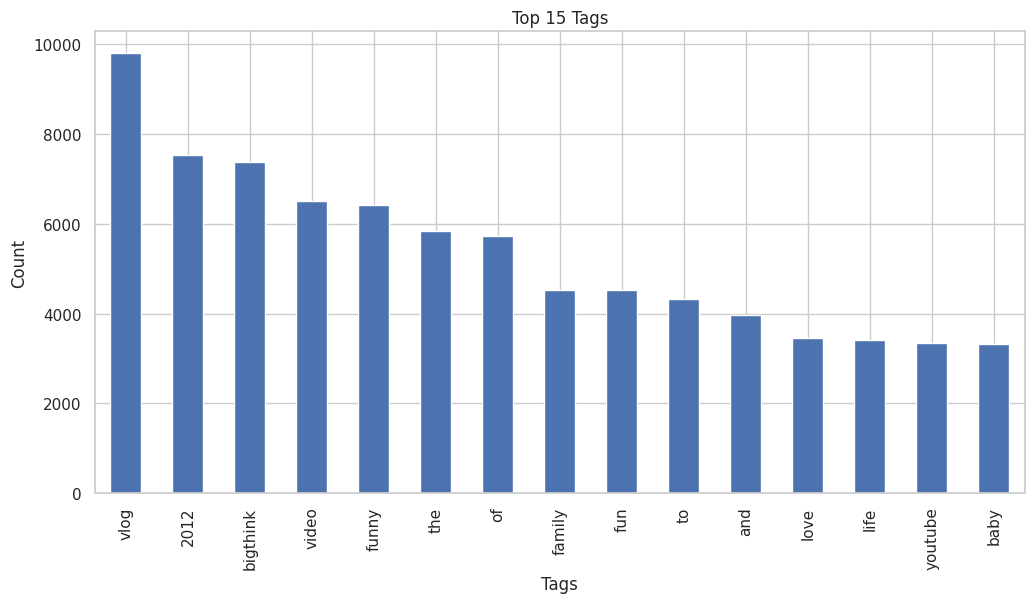

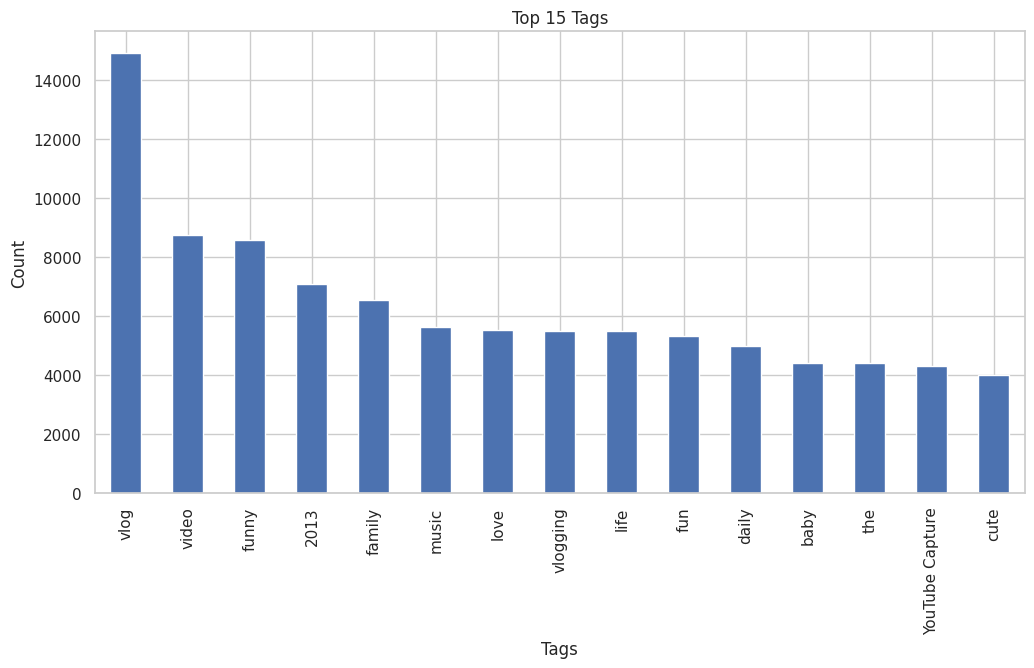

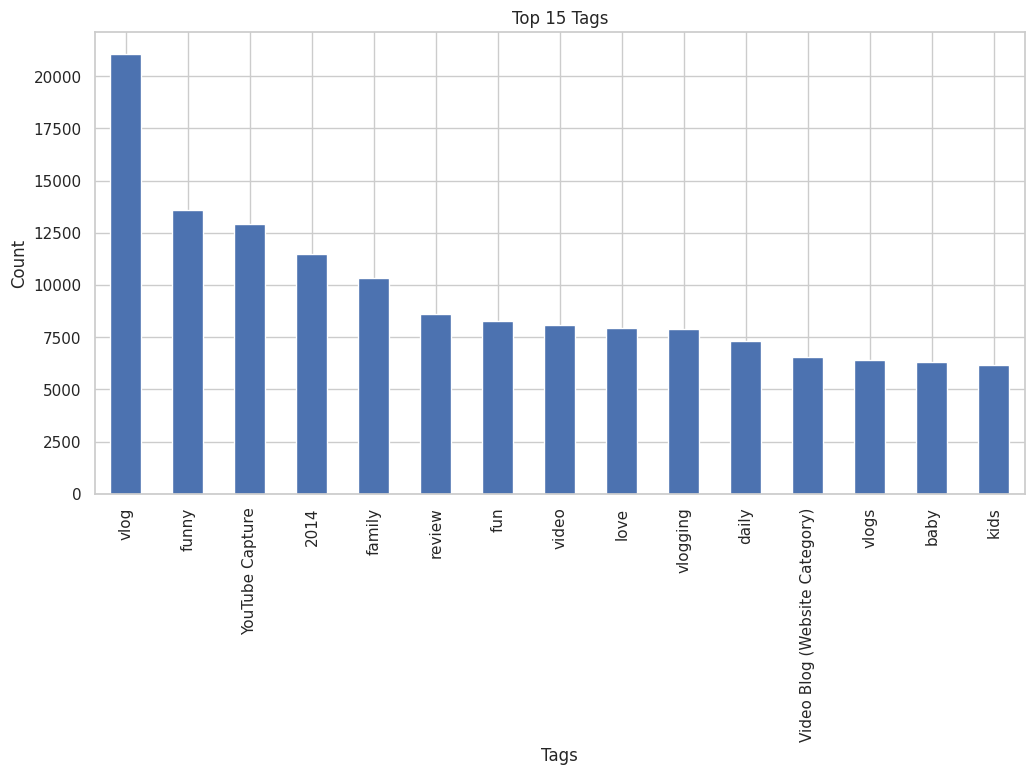

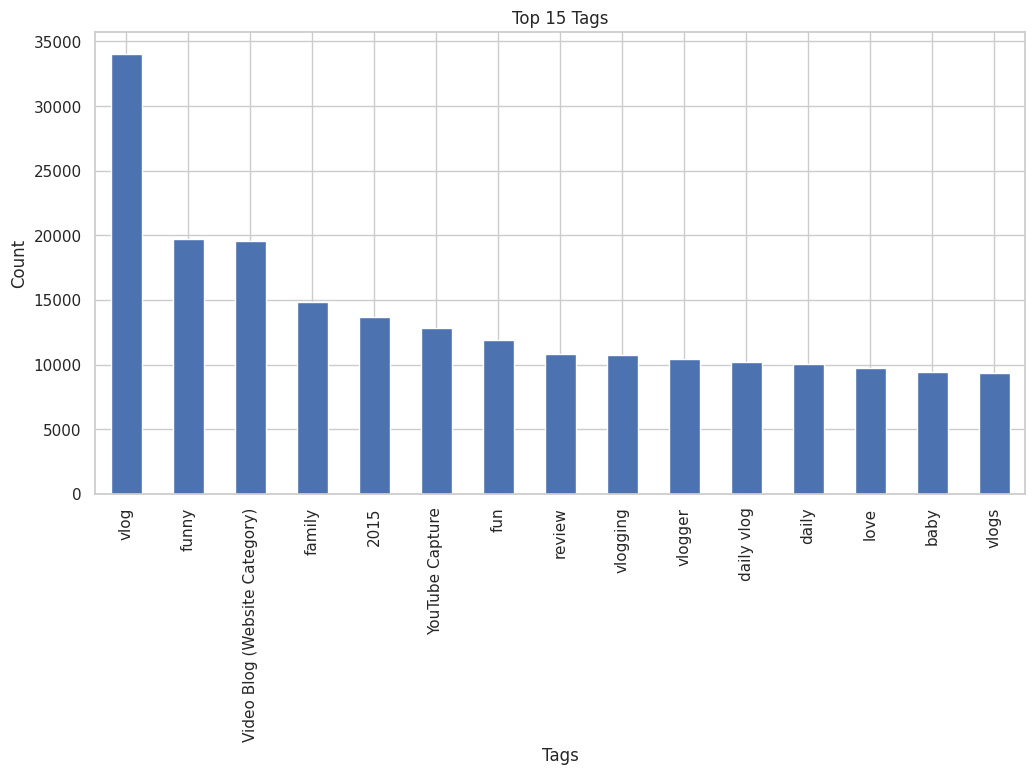

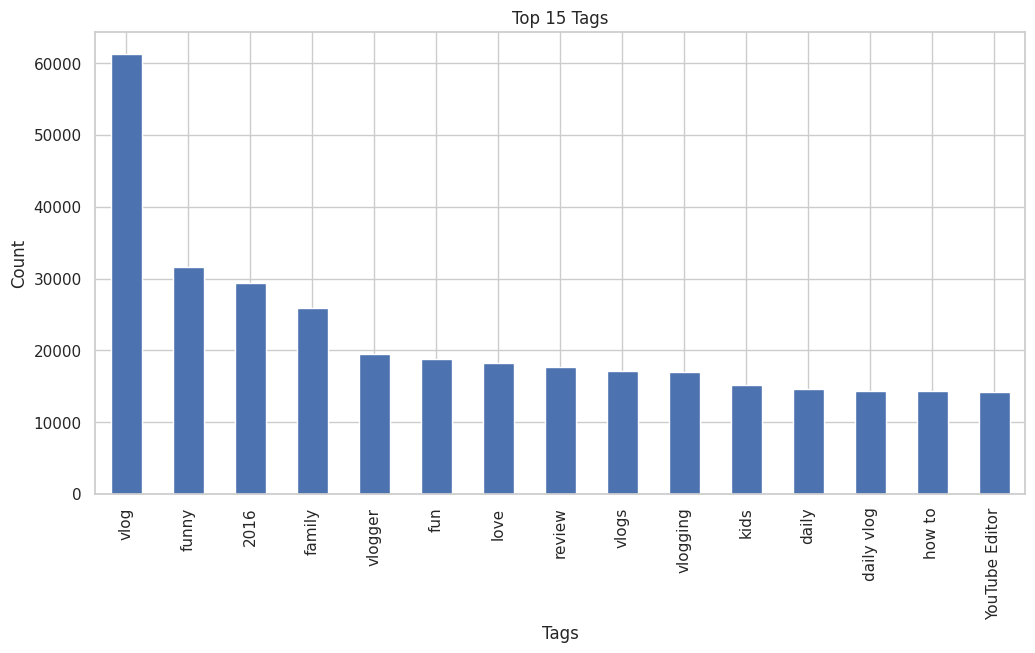

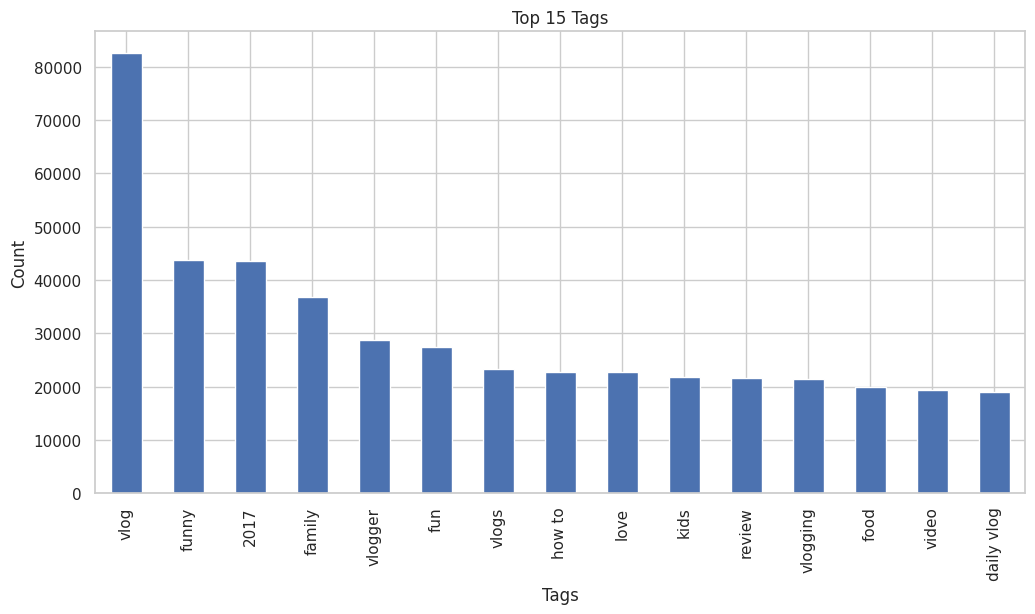

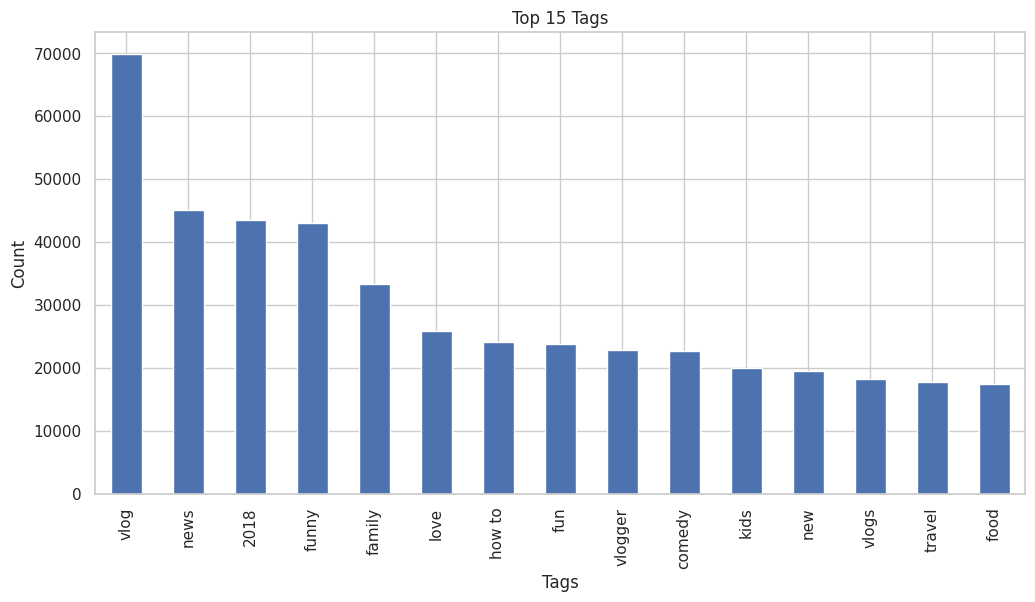

In [ ]:
years = range(2012, 2019)  # or whatever years are applicable
for year in years:
    yt_metadata_filt_year = yt_metadata_filtered[yt_metadata_filtered['upload_date'].dt.year == year]
    if not yt_metadata_filt_year.empty:
        try:
            # Assuming the function plot_topN_tag is correctly defined and can handle cases with less than N tags
            plt.figure(figsize=(12, 6))  # Creating a figure with a specific size
            plot_topN_tag(yt_metadata_filt_year['tags'], 15)
        except Exception as e:
            print(f"An error occurred for year {year}: {e}")
    else:
        print(f"No data available for year {year}")

In [ ]:
def clean_dataframe(df):
    # Remove rows where 'tags' is empty or NaN
    initial_row_count = len(df)
    df = df.dropna(subset=['tags'])  # Drops rows with NaN in 'tags'
    df = df[df['tags'].str.strip().astype(bool)]  # Drops rows with empty 'tags'
    cleaned_row_count = len(df)

    # Check for NaN values in 'like_count'
    like_count_nan = df['like_count'].isna().sum()
    if like_count_nan > 0:
        # Handle NaN values here. Options: fill with 0, mean, median, etc.
        # Example: df['like_count'].fillna(df['like_count'].median(), inplace=True)
        # For now, we'll just drop these rows
        df = df.dropna(subset=['like_count'])

    # Print out the cleaning summary
    print(f"Rows with empty 'tags' removed: {initial_row_count - cleaned_row_count}")
    print(f"Rows with NaN in 'like_count': {like_count_nan}")

    return df

yt_metadata_filt_clean = clean_dataframe(yt_metadata_filtered)

Rows with empty 'tags' removed: 1370120
Rows with NaN in 'like_count': 137518


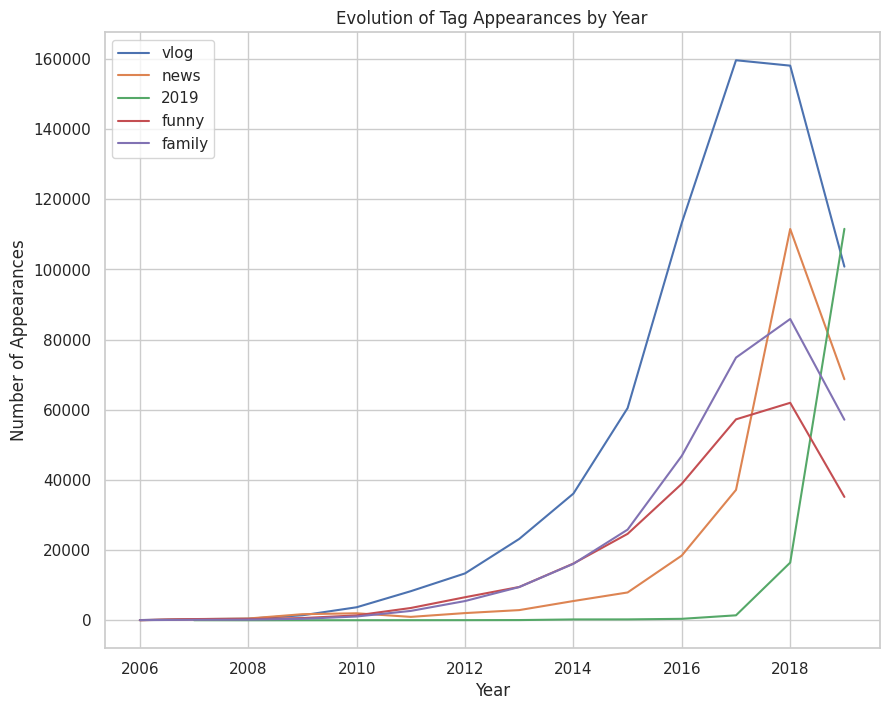

In [ ]:
def get_top_tags_for_year(df, year, top_n=5):
    """ Get the top N tags for a given year from the dataframe """
    year_data = df[df['upload_date'].dt.year == year]
    tag_list = year_data['tags'].str.split(',').explode()
    top_tags = tag_list.value_counts().head(top_n).index
    return top_tags

def count_tag_appearances_by_year(df, tags):
    """ Count the number of appearances of each tag by year """
    df['year'] = df['upload_date'].dt.year
    tag_counts_by_year = {tag: df[df['tags'].str.contains(tag)]['year'].value_counts().sort_index() for tag in tags}
    return tag_counts_by_year

def plot_tag_counts(tag_counts_by_year):
    """ Plot the evolution of tag counts over the years """
    plt.figure(figsize=(10, 8))
    for tag, counts in tag_counts_by_year.items():
        plt.plot(counts.index, counts.values, label=tag)

    plt.xlabel('Year')
    plt.ylabel('Number of Appearances')
    plt.title('Evolution of Tag Appearances by Year')
    plt.legend()
    plt.show()

top_tags_2019 = get_top_tags_for_year(yt_metadata_filt_clean, 2019)
tag_counts_by_year = count_tag_appearances_by_year(yt_metadata_filt_clean, top_tags_2019)
plot_tag_counts(tag_counts_by_year)

### What insights can be gained from the evolution of Vlog videos within "People & Blogs" over time (considering factors such as length, views, likes, dislikes, and comments)?

- Dataset Utilization: Utilize video metadata for detailed analysis of vlog videos, including likes, views, duration, and comments​​.

- Analysis Method: Examine how vlog video characteristics have changed over time and how these changes correlate with user engagement (views, likes, dislikes, comments). This can offer insights into the evolving nature of vlog content and audience preferences.

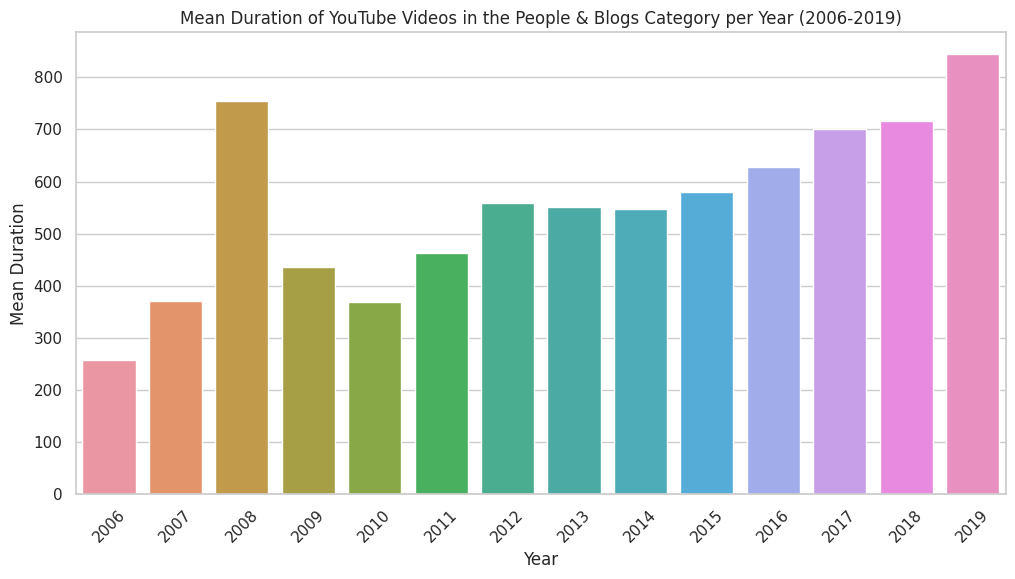

In [ ]:
df_duration = yt_metadata_filtered.groupby('yearNumber')['duration'].mean().reset_index()

# Rename the columns for clarity
df_duration.columns = ['Year', 'Mean Duration']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Mean Duration', data=df_duration)
plt.xticks(rotation=45)
plt.title('Mean Duration of YouTube Videos in the People & Blogs Category per Year (2006-2019)')
plt.show()

### How did Youtube channels morphing either into or out of the People & Blogs categories fare after the transition ? E.g. how was a channel's popularity affected after migrating from Gaming to Vlog ?

- Dataset Utilization: Analyze channel metadata and time-series data to track channels transitioning into or out of the "People & Blogs" category​​.

- Analysis Method: Compare the performance (subscriber growth, view counts) of channels before and after transitioning categories. This could provide insights into how category migration impacts channel popularity.